In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import PowerTransformer

## 1.Problem Statement
- Create a model to classify the Drug type based on their features

## 2. Data Collection

In [3]:
# collect the dataset from kaggle,which is used to create a good model for classification
data = pd.read_csv(r"/content/drive/MyDrive/Drugs project/drug.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## 3. EDA and Pre-processing

In [4]:
data.shape   # data set contains 200 rows and 6 columns

(200, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# convert type of BP & cholestrol column into category
data["BP"] = data["BP"].astype("category")
data["Cholesterol"] = data["Cholesterol"].astype("category")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    category
 3   Cholesterol  200 non-null    category
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 7.0+ KB


- This data contains some numerical data and categorical data.


In [8]:
data.duplicated().sum()    # there is no duplicated values are here.

0

In [9]:
data.Drug.value_counts()  # it is im balanced data

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [10]:
data.Sex.unique()     # Sex feature contains two values male as M and female as F

array(['F', 'M'], dtype=object)

In [11]:
data.BP.unique()      # BP feature contains three values HIGH,LOW and NORMAL.

['HIGH', 'LOW', 'NORMAL']
Categories (3, object): ['HIGH', 'LOW', 'NORMAL']

In [12]:
data.Cholesterol.unique()   # Cholesterol feature contains two values HIGH and NORMAL

['HIGH', 'NORMAL']
Categories (2, object): ['HIGH', 'NORMAL']

In [13]:
data.Drug.unique()         # Drug feature contains FIVE values DrugY,drugC,drugX,drugA and drugB.

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

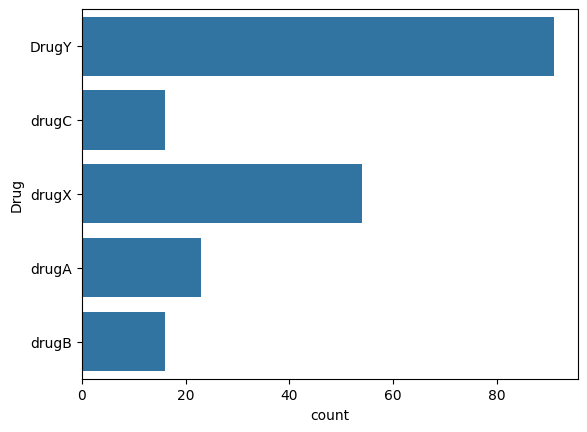

In [14]:
sns.countplot(data.Drug)
plt.show()

In [15]:
fv = data.iloc[:,:-1]    # split data into features and class variables
cv = data.iloc[:,-1]

In [16]:
fv.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [17]:
cv.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()    # create an instance of Lable encoder class
cv = lbe.fit_transform(cv)

In [19]:
cv

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

## 5. EDA

In [21]:
# find the relation between features
# Correlation matrix
corr_matrix = fv.corr()
corr_matrix

<ipython-input-21-bbbc88aca1ef>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fv.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


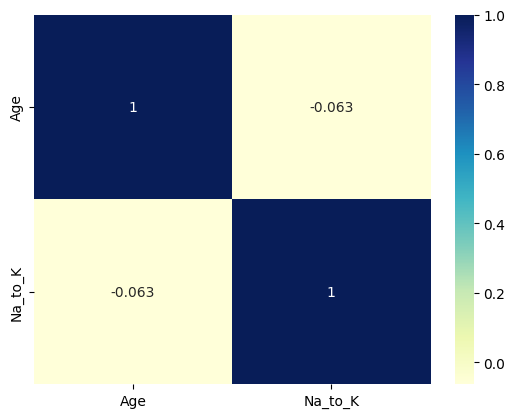

In [22]:
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

Based on above graphs, all the features follows Gaussian distribution,So we performe Gaussian Naive bayes

### 6.Feature Engineering

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer

In [24]:
# split fv and cv into x_train,x_test,y_train and y_test
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify = cv)

In [25]:
# split entire x_train into numerical,nominal and ordinal data
numerical_data=x_train.select_dtypes(include=["int64","float64"])
nominal_data=x_train.select_dtypes(include=["object"])
ordinal_data = x_train.select_dtypes(include = ["category"])

In [26]:
numerical_data.head()

,Age,Na_to_K
148,61,7.340
144,39,9.664
32,49,11.014
76,36,11.198
161,57,9.945


In [27]:
ordinal_data.head()

,BP,Cholesterol
148,LOW,NORMAL
144,HIGH,HIGH
32,LOW,NORMAL
76,HIGH,HIGH
161,HIGH,NORMAL


In [28]:
nominal_data.head()

,Sex
148,F
144,M
32,M
76,F
161,F


In [29]:
ordinal_data.columns

Index(['BP', 'Cholesterol'], dtype='object')

In [30]:
nup=Pipeline([('Null_values_imputation_1', SimpleImputer(strategy='mean')),
                           ('StandardScalar', StandardScaler()),
                           ('Power_Transform',PowerTransformer())])
nom_p = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('OH_Encoding', OneHotEncoder(sparse_output= False,drop= 'first'))])
ordinal_p = Pipeline([('Null_values_imputation_2', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [31]:
prepro_col_trans = ColumnTransformer(transformers= [('Ordinal_Pre-Processing', ordinal_p, ordinal_data.columns),
                                                    ('Nominal_Pre-Processing', nom_p, nominal_data.columns),
                                                    ('numerical_Pre-Processing', nup, numerical_data.columns)],
                                     remainder="passthrough")



In [32]:
final_pipe = Pipeline([('Pre-Processing',prepro_col_trans)])

In [33]:
final_pipe

Pipeline(steps=[('Pre-Processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal_Pre-Processing',
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal_Encoding',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'LOW',
                                                                                               'HIGH'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']]))]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')),
                                                 ('Nominal_P...
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OH_Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ('numerical_Pre-Processing',
                                                  Pipeline(steps=[('Null_values_imputation_1',
                                                                   SimpleImputer()),
                                                                  ('StandardScalar',
                                                                   StandardScaler()),
                                                                  ('Power_Transform',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object'))]))])

In [34]:
final_pipe.fit_transform(x_train)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.79596531e-01, -1.71939536e+00],
       [ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -3.84777841e-01, -1.05009780e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.27534807e-01, -7.03019302e-01],
       [ 2.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.65844154e-01, -6.58123510e-01],
       [ 2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.27238413e-01, -9.75302648e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.36070618e+00,  8.90698729e-01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -8.05804808e-01, -1.03722690e+00],
       [ 2.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         9.79596531e-01,  1.31200785e+00],
       [ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -6.86019479e-01,  6.71177933e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.10630967e+00

In [35]:
final_pipe.get_feature_names_out()

array(['Ordinal_Pre-Processing__BP',
       'Ordinal_Pre-Processing__Cholesterol',
       'Nominal_Pre-Processing__Sex_M', 'numerical_Pre-Processing__Age',
       'numerical_Pre-Processing__Na_to_K'], dtype=object)

In [36]:
final_x_train = final_pipe.fit_transform(x_train)
final_x_test = final_pipe.transform(x_test)

## 7.Training

In [37]:
pip install mixed-naive-bayes

In [38]:
from mixed_naive_bayes import MixedNB

In [39]:
mb = MixedNB(categorical_features= [0,1,2])
model = mb.fit(final_x_train, y_train)

then finally we create a model for the Mixed Naive bayes

### 8. Model Evaluation

#### finding precission score of model

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix(y_test,model.predict(final_x_test))

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 11]])

In [41]:
accuracy_score(y_test,model.predict(final_x_test))

0.95

In [42]:
print(classification_report(y_test, model.predict(final_x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.33      0.50         3
           4       0.85      1.00      0.92        11

    accuracy                           0.95        40
   macro avg       0.97      0.87      0.88        40
weighted avg       0.96      0.95      0.94        40



It will give the accuracy rate of 99% by using Precision_score

In [43]:
import pickle

In [44]:
pickle.dump(final_pipe, open(r"/content/drive/MyDrive/Drugs project/final_pre.pkl",'wb'))
pickle.dump(model, open(r"/content/drive/MyDrive/Drugs project/model.pkl", 'wb'))


## 9.Testing

In [45]:
lbe.classes_    # class labels of Drug column sequencially.

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [46]:
dict = {}
for i in lbe.classes_:                        # create a dictionary index of lbe.classes_ as key and lbe.classes_ as value
  dict[list(lbe.classes_).index(i)] = i
dict

{0: 'DrugY', 1: 'drugA', 2: 'drugB', 3: 'drugC', 4: 'drugX'}

In [47]:
m = pd.DataFrame(list(final_x_test)).iloc[[2]]
pred = model.predict(m)   # it is used to shows that predicted value
print(dict[pred[0]])      # it will give Class label of drugs based on features

DrugY


i will give a query point from x_test.iloc[[2]] as input to the model,then it will returns class label is drugA